# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from src.get_data import *
from src.preprocessing import *
from src.create_output import *

%load_ext autoreload
%autoreload 2

# Load data

In [4]:
bd_full = pd.read_csv('data/business.csv')
bd_full['attributes_AgesAllowed'].unique()

array([nan, '21plus', 'allages', '19plus', '18plus'], dtype=object)

In [5]:
b_data, u_data, reviews = get_training_data(b_cols='maybe', verbose=True)
v_queries = get_validation_reviews()

X, y = construct_design_matrix(b_data, u_data, reviews, verbose=True)
X_valid, y_valid = construct_design_matrix(b_data, u_data, v_queries, verbose=True)

b_data.head()

========== Feature 'attributes_AcceptsInsurance' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_AgesAllowed' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_Alcohol' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_Ambience' ==========
TYPE: dict. Creating new features and doing one-hot encoding.

========== Feature 'attributes_BusinessParking' ==========
TYPE: dict. Creating new features and doing one-hot encoding.

========== Feature 'attributes_Caters' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_DogsAllowed' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_GoodForDancing' ==========
TYPE: boolean. Changing

,attributes_AcceptsInsurance,attributes_Caters,attributes_DogsAllowed,attributes_GoodForDancing,attributes_GoodForKids,attributes_HasTV,attributes_OutdoorSeating,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,...,attributes_NoiseLevelLOUD,attributes_NoiseLevelQUIET,attributes_RestaurantsAttireCASUAL,attributes_RestaurantsAttireNAN,attributes_RestaurantsAttireDRESSY,attributes_RestaurantsAttireFORMAL,attributes_WiFiNO,attributes_WiFiFREE,attributes_WiFiNAN,attributes_WiFiPAID
business_id,,,,,,,,,,,,,,,,,,,,,
KuxDPl6UYNLxFChPm0_MNw,0.014099,1.0,0.000000,0.186432,0.0,0.0,1.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6SAfQKe2oM5g_EtcYXyAMg,0.014099,0.0,0.226737,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
upB0RQl-l529IVwgOpwOQQ,0.014099,0.0,0.226737,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TulmRC5V0--dnXYd_GOSvA,0.014099,0.0,0.226737,0.186432,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
yqYtY3-Po4OVPafA9Z-Xyw,0.014099,1.0,0.226737,0.186432,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
X_test = construct_test_matrix(b_data, u_data, verbose=True)

Constructing test feature-matrix now.
0/50078 done
10000/50078 done
20000/50078 done
30000/50078 done
40000/50078 done
50000/50078 done
Finished!


# Preprocessing / dimensionality reduction

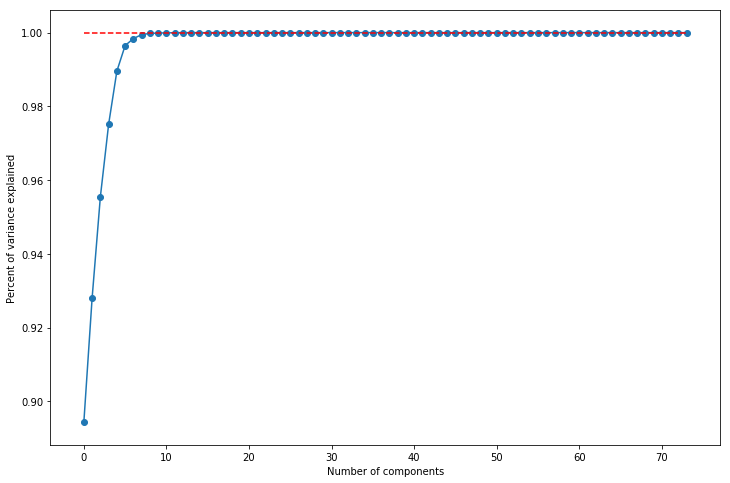

Using 20 components - 1.000000 of variance explained.


In [25]:
X_n = normalize_columns(X)
X_valid_n = normalize_columns(X_valid)

Z = get_PCA_matrix(X, n_components=20, plot_expl_variance=True, verbose=True)
X_pca = np.dot(X, Z.T)
X_valid_pca = np.dot(X_valid, Z.T)

# Hyperparameter Tuning

In [8]:
results = dict()

def rmse(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [9]:
min_validation_mse = (float('inf'), 0.1)
for penalty_constant in np.linspace(0.1, 50, 4990):
    clf = Ridge(alpha=penalty_constant)
    clf.fit(X, y)
    # training error
    y_pred_train = clf.predict(X)
    mse_train = rmse(y, y_pred_train)
    #print('{}  <- Training RMSE with alpha={}'.format(mse_train, penalty_constant))

    # validation error
    y_pred_valid = clf.predict(X_valid)
    mse_valid = rmse(y_valid, y_pred_valid)
    #print('{}  <- Validation RMSE with alpha={}'.format(mse_valid, penalty_constant))
    if mse_valid < min_validation_mse[0]:
        print('{}  <- New min RMSE, updated alpha to {}'.format(mse_valid, penalty_constant))
        min_validation_mse = (mse_valid, penalty_constant)
    if penalty_constant - np.floor(penalty_constant) < 0.01:
        print(f"Making progress: penalty constant of {penalty_constant}, rmse of {mse_valid}")
opt_penalty = min_validation_mse[1]
print("Optimal penalty constant of {} found".format(opt_penalty))

1.0525033820088612  <- New min RMSE, updated alpha to 0.1
1.052503377591352  <- New min RMSE, updated alpha to 0.11000200440970134
1.0525033731841362  <- New min RMSE, updated alpha to 0.1200040088194027
1.0525033687871859  <- New min RMSE, updated alpha to 0.13000601322910404
1.0525033644004724  <- New min RMSE, updated alpha to 0.14000801763880538
1.0525033600239682  <- New min RMSE, updated alpha to 0.15001002204850672
1.052503355657644  <- New min RMSE, updated alpha to 0.16001202645820806
1.0525033513014728  <- New min RMSE, updated alpha to 0.1700140308679094
1.0525033469554264  <- New min RMSE, updated alpha to 0.18001603527761073
1.0525033426194768  <- New min RMSE, updated alpha to 0.19001803968731207
1.0525033382935967  <- New min RMSE, updated alpha to 0.20002004409701343
1.0525033339777583  <- New min RMSE, updated alpha to 0.21002204850671477
1.0525033296719342  <- New min RMSE, updated alpha to 0.2200240529164161
1.052503325376097  <- New min RMSE, updated alpha to 0.2300

1.0525029453731864  <- New min RMSE, updated alpha to 1.2202244938865505
1.052502941953996  <- New min RMSE, updated alpha to 1.2302264982962519
1.0525029385424933  <- New min RMSE, updated alpha to 1.2402285027059532
1.0525029351386594  <- New min RMSE, updated alpha to 1.2502305071156545
1.0525029317424757  <- New min RMSE, updated alpha to 1.2602325115253559
1.052502928353923  <- New min RMSE, updated alpha to 1.2702345159350572
1.052502924972983  <- New min RMSE, updated alpha to 1.2802365203447585
1.052502921599637  <- New min RMSE, updated alpha to 1.2902385247544599
1.0525029182338663  <- New min RMSE, updated alpha to 1.3002405291641612
1.0525029148756524  <- New min RMSE, updated alpha to 1.3102425335738626
1.052502911524977  <- New min RMSE, updated alpha to 1.320244537983564
1.0525029081818218  <- New min RMSE, updated alpha to 1.3302465423932652
1.0525029048461683  <- New min RMSE, updated alpha to 1.3402485468029666
1.052502901517998  <- New min RMSE, updated alpha to 1.35

1.0525026036074219  <- New min RMSE, updated alpha to 2.350450992182802
1.052502600950812  <- New min RMSE, updated alpha to 2.3604529965925036
1.0525025983001033  <- New min RMSE, updated alpha to 2.3704550010022047
1.0525025956552831  <- New min RMSE, updated alpha to 2.3804570054119063
1.0525025930163379  <- New min RMSE, updated alpha to 2.3904590098216074
1.0525025903832548  <- New min RMSE, updated alpha to 2.400461014231309
1.0525025877560206  <- New min RMSE, updated alpha to 2.41046301864101
1.0525025851346226  <- New min RMSE, updated alpha to 2.4204650230507117
1.0525025825190475  <- New min RMSE, updated alpha to 2.4304670274604128
1.0525025799092829  <- New min RMSE, updated alpha to 2.4404690318701143
1.0525025773053152  <- New min RMSE, updated alpha to 2.4504710362798154
1.0525025747071324  <- New min RMSE, updated alpha to 2.460473040689517
1.052502572114721  <- New min RMSE, updated alpha to 2.470475045099218
1.0525025695280688  <- New min RMSE, updated alpha to 2.480

1.0525023379130816  <- New min RMSE, updated alpha to 3.480677490479054
1.052502335848558  <- New min RMSE, updated alpha to 3.490679494888755
1.0525023337886696  <- New min RMSE, updated alpha to 3.5006814992984565
1.0525023317334077  <- New min RMSE, updated alpha to 3.5106835037081576
1.0525023296827618  <- New min RMSE, updated alpha to 3.520685508117859
1.052502327636723  <- New min RMSE, updated alpha to 3.5306875125275607
1.0525023255952821  <- New min RMSE, updated alpha to 3.540689516937262
1.0525023235584292  <- New min RMSE, updated alpha to 3.5506915213469634
1.0525023215261555  <- New min RMSE, updated alpha to 3.5606935257566645
1.052502319498451  <- New min RMSE, updated alpha to 3.570695530166366
1.0525023174753072  <- New min RMSE, updated alpha to 3.580697534576067
1.0525023154567141  <- New min RMSE, updated alpha to 3.5906995389857688
1.0525023134426628  <- New min RMSE, updated alpha to 3.60070154339547
1.0525023114331438  <- New min RMSE, updated alpha to 3.610703

1.05250213188843  <- New min RMSE, updated alpha to 4.610903988775305
1.0525021302932032  <- New min RMSE, updated alpha to 4.620905993185007
1.052502128701684  <- New min RMSE, updated alpha to 4.630907997594708
1.0525021271138666  <- New min RMSE, updated alpha to 4.640910002004409
1.0525021255297433  <- New min RMSE, updated alpha to 4.65091200641411
1.0525021239493073  <- New min RMSE, updated alpha to 4.660914010823812
1.0525021223725513  <- New min RMSE, updated alpha to 4.670916015233513
1.0525021207994687  <- New min RMSE, updated alpha to 4.680918019643214
1.0525021192300523  <- New min RMSE, updated alpha to 4.690920024052915
1.0525021176642952  <- New min RMSE, updated alpha to 4.700922028462617
1.0525021161021904  <- New min RMSE, updated alpha to 4.7109240328723185
1.0525021145437312  <- New min RMSE, updated alpha to 4.72092603728202
1.0525021129889105  <- New min RMSE, updated alpha to 4.730928041691721
1.0525021114377215  <- New min RMSE, updated alpha to 4.740930046101

1.0525019723324365  <- New min RMSE, updated alpha to 5.7511324914812585
1.052501971118447  <- New min RMSE, updated alpha to 5.76113449589096
1.0525019699074636  <- New min RMSE, updated alpha to 5.771136500300661
1.0525019686994812  <- New min RMSE, updated alpha to 5.781138504710362
1.0525019674944942  <- New min RMSE, updated alpha to 5.791140509120064
1.0525019662924977  <- New min RMSE, updated alpha to 5.801142513529765
1.052501965093486  <- New min RMSE, updated alpha to 5.811144517939466
1.052501963897454  <- New min RMSE, updated alpha to 5.821146522349167
1.052501962704396  <- New min RMSE, updated alpha to 5.831148526758869
1.0525019615143074  <- New min RMSE, updated alpha to 5.84115053116857
1.0525019603271824  <- New min RMSE, updated alpha to 5.851152535578271
1.052501959143016  <- New min RMSE, updated alpha to 5.8611545399879725
1.0525019579618031  <- New min RMSE, updated alpha to 5.8711565443976745
1.052501956783538  <- New min RMSE, updated alpha to 5.8811585488073

1.0525018511898527  <- New min RMSE, updated alpha to 6.9013629985969125
1.0525018502893648  <- New min RMSE, updated alpha to 6.911365003006614
1.0525018493913418  <- New min RMSE, updated alpha to 6.921367007416315
1.052501848495779  <- New min RMSE, updated alpha to 6.931369011826017
1.052501847602673  <- New min RMSE, updated alpha to 6.941371016235718
1.0525018467120193  <- New min RMSE, updated alpha to 6.951373020645419
1.0525018458238136  <- New min RMSE, updated alpha to 6.961375025055121
1.0525018449380523  <- New min RMSE, updated alpha to 6.971377029464822
1.0525018440547307  <- New min RMSE, updated alpha to 6.981379033874523
1.0525018431738453  <- New min RMSE, updated alpha to 6.991381038284224
1.052501842295392  <- New min RMSE, updated alpha to 7.001383042693926
Making progress: penalty constant of 7.001383042693926, rmse of 1.052501842295392
1.0525018414193665  <- New min RMSE, updated alpha to 7.011385047103627
1.052501840545765  <- New min RMSE, updated alpha to 7.0

1.052501764768298  <- New min RMSE, updated alpha to 8.021587492483464
1.052501764120122  <- New min RMSE, updated alpha to 8.031589496893165
1.0525017634739997  <- New min RMSE, updated alpha to 8.041591501302866
1.0525017628299278  <- New min RMSE, updated alpha to 8.051593505712567
1.0525017621879027  <- New min RMSE, updated alpha to 8.061595510122268
1.0525017615479215  <- New min RMSE, updated alpha to 8.07159751453197
1.0525017609099807  <- New min RMSE, updated alpha to 8.08159951894167
1.0525017602740772  <- New min RMSE, updated alpha to 8.091601523351372
1.0525017596402078  <- New min RMSE, updated alpha to 8.101603527761073
1.052501759008369  <- New min RMSE, updated alpha to 8.111605532170774
1.0525017583785583  <- New min RMSE, updated alpha to 8.121607536580477
1.0525017577507716  <- New min RMSE, updated alpha to 8.131609540990178
1.0525017571250066  <- New min RMSE, updated alpha to 8.14161154539988
1.0525017565012593  <- New min RMSE, updated alpha to 8.15161354980958

1.052501702929271  <- New min RMSE, updated alpha to 9.171817999599117
1.0525017024974639  <- New min RMSE, updated alpha to 9.181820004008818
1.0525017020673764  <- New min RMSE, updated alpha to 9.19182200841852
1.0525017016390055  <- New min RMSE, updated alpha to 9.20182401282822
1.0525017012123488  <- New min RMSE, updated alpha to 9.211826017237923
1.0525017007874038  <- New min RMSE, updated alpha to 9.221828021647624
1.0525017003641677  <- New min RMSE, updated alpha to 9.231830026057326
1.0525016999426382  <- New min RMSE, updated alpha to 9.241832030467027
1.0525016995228127  <- New min RMSE, updated alpha to 9.251834034876728
1.0525016991046885  <- New min RMSE, updated alpha to 9.261836039286429
1.0525016986882632  <- New min RMSE, updated alpha to 9.27183804369613
1.0525016982735342  <- New min RMSE, updated alpha to 9.281840048105831
1.0525016978604989  <- New min RMSE, updated alpha to 9.291842052515534
1.0525016974491548  <- New min RMSE, updated alpha to 9.301844056925

1.0525016644410077  <- New min RMSE, updated alpha to 10.302044497895368
1.0525016641882423  <- New min RMSE, updated alpha to 10.312046502305071
1.0525016639369336  <- New min RMSE, updated alpha to 10.322048506714772
1.0525016636870794  <- New min RMSE, updated alpha to 10.332050511124473
1.0525016634386775  <- New min RMSE, updated alpha to 10.342052515534174
1.0525016631917261  <- New min RMSE, updated alpha to 10.352054519943875
1.0525016629462227  <- New min RMSE, updated alpha to 10.362056524353576
1.052501662702166  <- New min RMSE, updated alpha to 10.372058528763278
1.0525016624595531  <- New min RMSE, updated alpha to 10.38206053317298
1.052501662218382  <- New min RMSE, updated alpha to 10.392062537582682
1.0525016619786516  <- New min RMSE, updated alpha to 10.402064541992383
1.0525016617403586  <- New min RMSE, updated alpha to 10.412066546402084
1.0525016615035019  <- New min RMSE, updated alpha to 10.422068550811785
1.0525016612680786  <- New min RMSE, updated alpha to 

1.0525016447331246  <- New min RMSE, updated alpha to 11.42226899178192
1.0525016446313662  <- New min RMSE, updated alpha to 11.43227099619162
1.052501644530853  <- New min RMSE, updated alpha to 11.442273000601322
1.0525016444315833  <- New min RMSE, updated alpha to 11.452275005011023
1.0525016443335555  <- New min RMSE, updated alpha to 11.462277009420724
1.0525016442367678  <- New min RMSE, updated alpha to 11.472279013830425
1.0525016441412185  <- New min RMSE, updated alpha to 11.482281018240128
1.052501644046906  <- New min RMSE, updated alpha to 11.49228302264983
1.0525016439538284  <- New min RMSE, updated alpha to 11.50228502705953
1.0525016438619843  <- New min RMSE, updated alpha to 11.512287031469231
1.0525016437713717  <- New min RMSE, updated alpha to 11.522289035878932
1.0525016436819892  <- New min RMSE, updated alpha to 11.532291040288634
1.052501643593835  <- New min RMSE, updated alpha to 11.542293044698335
1.0525016435069077  <- New min RMSE, updated alpha to 11.5

KeyboardInterrupt: 

In [16]:
min_tolerance = (float('inf'), 1)
for curr_tol in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    clf = Ridge(alpha=opt_penalty, tol=curr_tol)
    clf.fit(X, y)
    # training error
    y_pred_train = clf.predict(X)
    mse_train = rmse(y, y_pred_train)
    print('{}  <- Training RMSE with tol={}'.format(mse_train, curr_tol))

    # validation error
    y_pred_valid = clf.predict(X_valid)
    mse_valid = rmse(y_valid, y_pred_valid)
    print('{}  <- Validation RMSE with tol={}'.format(mse_valid, curr_tol))
    if mse_valid < min_tolerance[0]:
        print('{}  <- New min RMSE, updated tol to {}'.format(mse_valid, curr_tol))
        min_tolerance = (mse_valid, curr_tol)
opt_tol = min_tolerance[1]
print("Optimal tolerance of {} found".format(opt_tol))

1.0042480670935552  <- Training RMSE with tol=0.01
1.05250164036453  <- Validation RMSE with tol=0.01
1.05250164036453  <- New min RMSE, updated tol to 0.01
1.0042480670935552  <- Training RMSE with tol=0.001
1.05250164036453  <- Validation RMSE with tol=0.001
1.0042480670935552  <- Training RMSE with tol=0.0001
1.05250164036453  <- Validation RMSE with tol=0.0001
1.0042480670935552  <- Training RMSE with tol=1e-05
1.05250164036453  <- Validation RMSE with tol=1e-05
1.0042480670935552  <- Training RMSE with tol=1e-06
1.05250164036453  <- Validation RMSE with tol=1e-06
1.0042480670935552  <- Training RMSE with tol=1e-07
1.05250164036453  <- Validation RMSE with tol=1e-07
Optimal tolerance of 0.01 found


# Regression

In [17]:
print(f"opt_penalty_constant: {opt_penalty}")

opt_penalty_constant: 12.292443375425936


In [18]:
clf_cv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 2.5, opt_penalty, 10])
clf_cv.fit(X, y)
y_cv_test = clf_cv.predict(X_test)
y_cv_cleaned = format_output(y_cv_test)
write_output(y_cv_cleaned, 'ridge_cv_maybe_regression')
print("wrote output")

# training error
y_cv_pred_train = clf_cv.predict(X)
mse_cv_train = rmse(y, y_cv_pred_train)
print('%f  <- Training RMSE' % mse_cv_train)

wrote output
1.004248  <- Training RMSE


In [19]:
clf = Ridge(alpha=opt_penalty, tol=0.0001)
clf.fit(X, y)
y_test = clf.predict(X_test)
y_cleaned = format_output(y_test)
write_output(y_cleaned, 'ridge_regression_maybe')
print("wrote output")



wrote output


In [23]:
clf_n = Ridge(alpha=opt_penalty)
clf_n.fit(X_n, y)
y_n_test = clf_n.predict(X_test)
y_n_cleaned = format_output(y_test)
write_output(y_n_cleaned, 'ridge_regression_maybe_norm')
print("wrote output")



wrote output


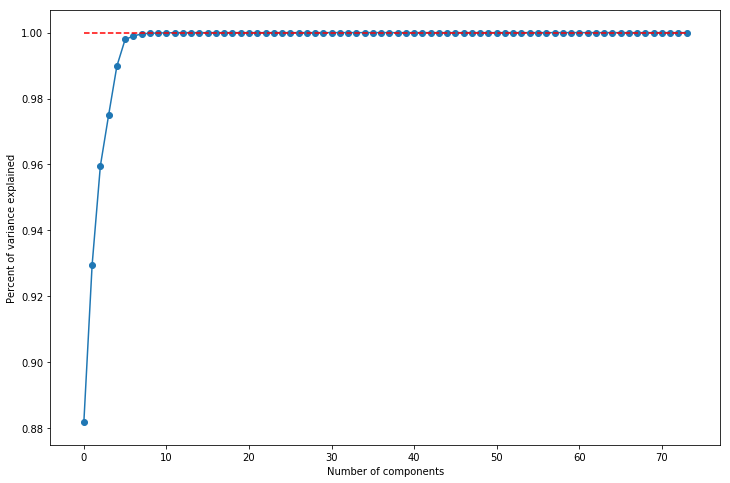

Using 20 components - 1.000000 of variance explained.
wrote output


In [26]:
clf_pca = Ridge(alpha=opt_penalty)
clf_pca.fit(X_pca, y)
Z = get_PCA_matrix(X_test, n_components=20, plot_expl_variance=True, verbose=True)
X_pca_test = np.dot(X_test, Z.T)
y_pca_test = clf_pca.predict(X_pca_test)
y_pca_cleaned = format_output(y_pca_test)
write_output(y_pca_cleaned, 'ridge_regression_maybe_pca')
print("wrote output")



In [27]:
# training error
y_pred_train = clf.predict(X)
mse_train = rmse(y, y_pred_train)
print('%f  <- Training RMSE' % mse_train)

# training error (normalized columns)
y_pred_train_norm = clf_n.predict(X_n)
mse_train_norm = rmse(y, y_pred_train_norm)
print('%f  <- Training RMSE (norm)' % mse_train_norm)

# training error (PCA)
y_pred_train_pca = clf_pca.predict(X_pca)
mse_train_pca = rmse(y, y_pred_train_pca)
print('%f  <- Training RMSE (PCA)' % mse_train_pca)

print('')

# validation error
y_pred_valid = clf.predict(X_valid)
mse_valid = rmse(y_valid, y_pred_valid)
print('%f  <- Validation RMSE' % mse_valid)

# validation error (normalized columns)
y_pred_valid_norm = clf_n.predict(X_valid_n)
mse_valid_norm = rmse(y_valid, y_pred_valid_norm)
print('%f  <- Validation RMSE (norm)' % mse_valid_norm)

# validation error (PCA)
y_pred_valid_pca = clf_pca.predict(X_valid_pca)
mse_valid_pca = rmse(y_valid, y_pred_valid_pca)
print('%f  <- Validation RMSE (PCA)' % mse_valid_pca)

1.004248  <- Training RMSE
1.004756  <- Training RMSE (norm)
1.146475  <- Training RMSE (PCA)

1.052502  <- Validation RMSE
1.088238  <- Validation RMSE (norm)
1.264998  <- Validation RMSE (PCA)


# Inspect weight vector

num weights ~= 0: 9


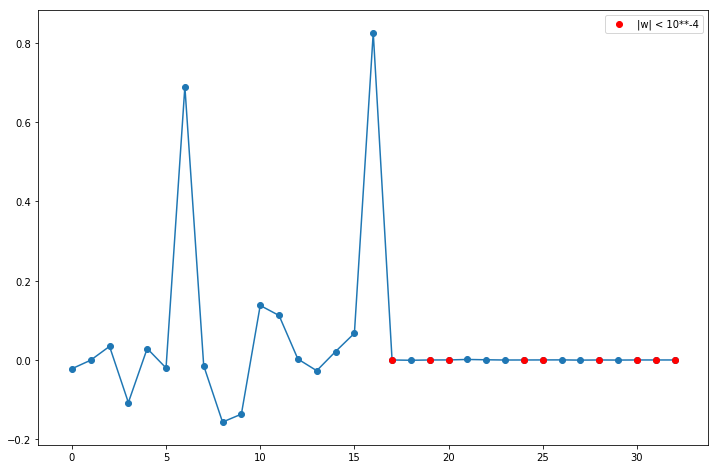

In [99]:
w = clf.coef_
xs = range(len(w))

tiny_weights = np.argwhere(abs(w) <= 10**-4)
print('num weights ~= 0: %d' % len(tiny_weights))


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(xs, w)
ax.scatter(xs, w)
ax.scatter(tiny_weights, w[tiny_weights], color='red', zorder=5, label='|w| < 10**-4')
plt.legend()
plt.show()

In [102]:
all_columns = np.append(b_data.columns, u_data.columns)

for i, col in enumerate(all_columns):
    if w[i] < 0:
        print('%f  <- |w| for %s' % (w[i], col))
    else:
        print(' %f  <- |w| for %s' % (w[i], col))

-0.022158  <- |w| for attributes_GoodForKids
-0.000530  <- |w| for attributes_OutdoorSeating
 0.034338  <- |w| for attributes_RestaurantsDelivery
-0.107442  <- |w| for attributes_RestaurantsGoodForGroups
 0.028911  <- |w| for attributes_RestaurantsPriceRange2
-0.020178  <- |w| for attributes_RestaurantsReservations
 0.689842  <- |w| for stars
-0.014527  <- |w| for attributes_AgesAllowedNAN
-0.156745  <- |w| for attributes_AgesAllowed21PLUS
-0.136656  <- |w| for attributes_AgesAllowedALLAGES
 0.137557  <- |w| for attributes_AgesAllowed19PLUS
 0.112263  <- |w| for attributes_AgesAllowed18PLUS
 0.002355  <- |w| for attributes_WiFiNO
-0.027051  <- |w| for attributes_WiFiFREE
 0.021345  <- |w| for attributes_WiFiNAN
 0.067386  <- |w| for attributes_WiFiPAID
 0.826106  <- |w| for average_stars
-0.000019  <- |w| for compliment_cool
-0.000743  <- |w| for compliment_cute
-0.000019  <- |w| for compliment_funny
 0.000086  <- |w| for compliment_hot
 0.001274  <- |w| for compliment_list
 0.000479  